In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ab = pd.read_csv('/content/Life Expectancy Data.csv')

#### 1) EDA

In [ ]:
# prompt: Summary statistics for ab

ab.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


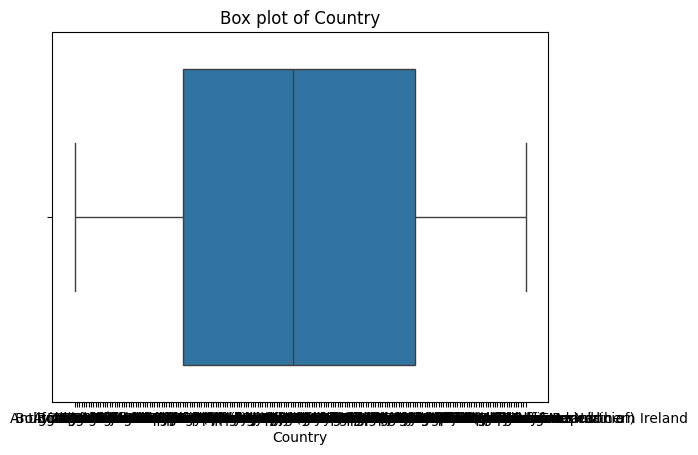

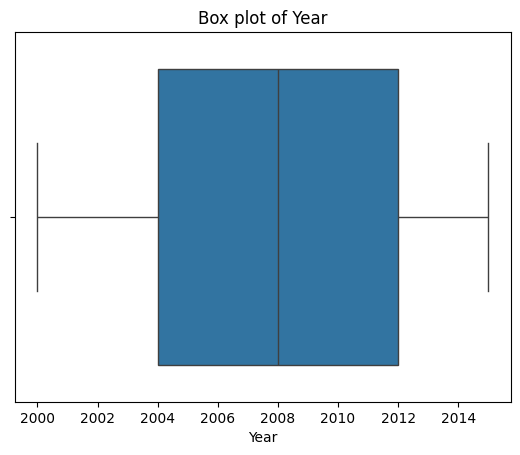

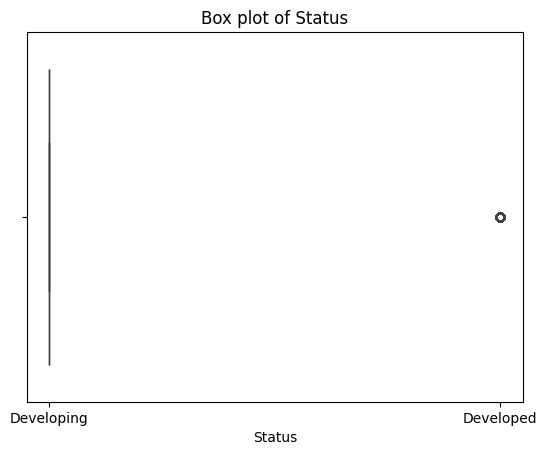

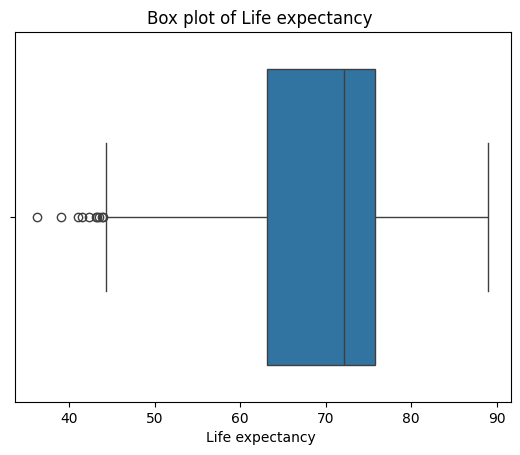

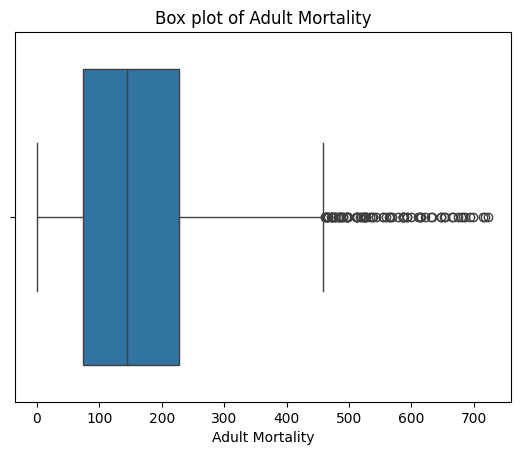

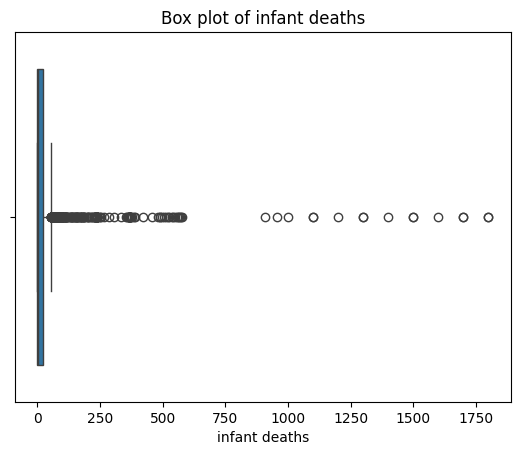

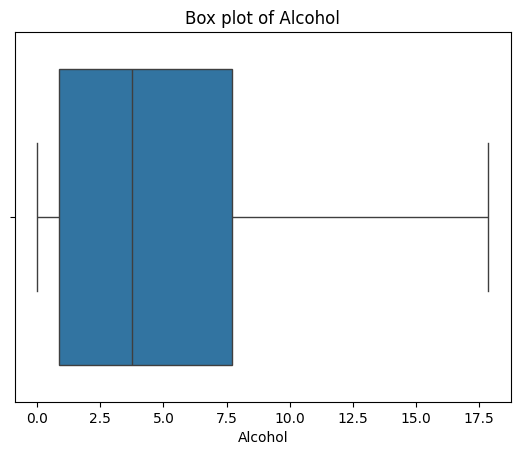

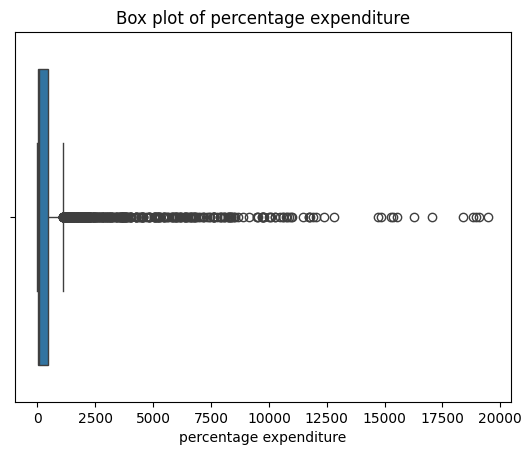

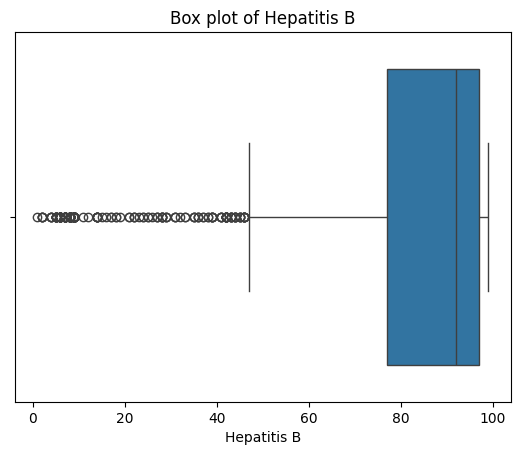

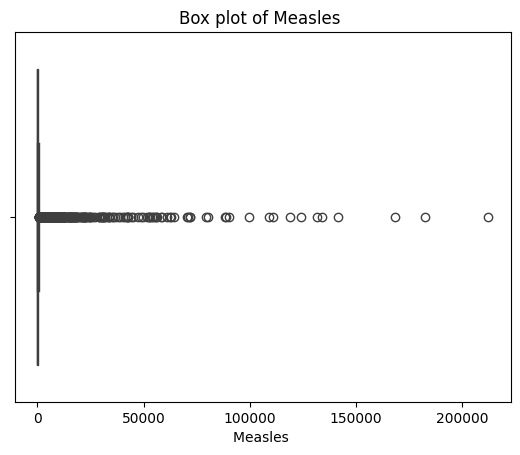

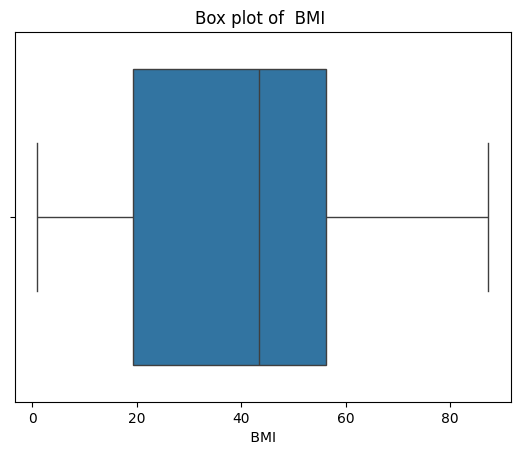

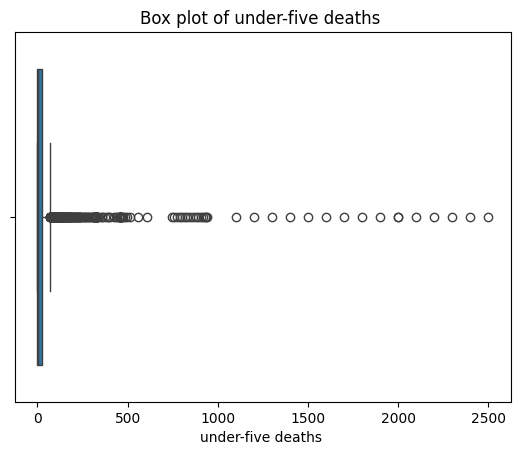

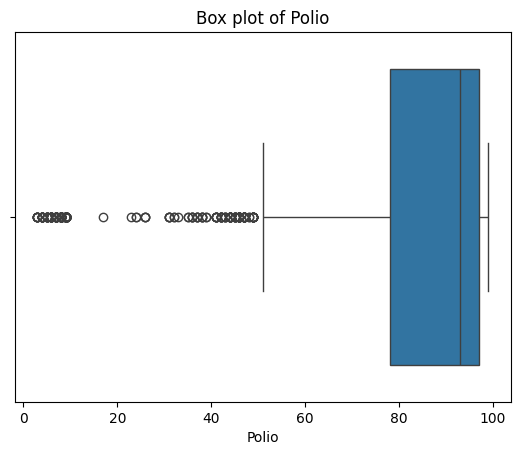

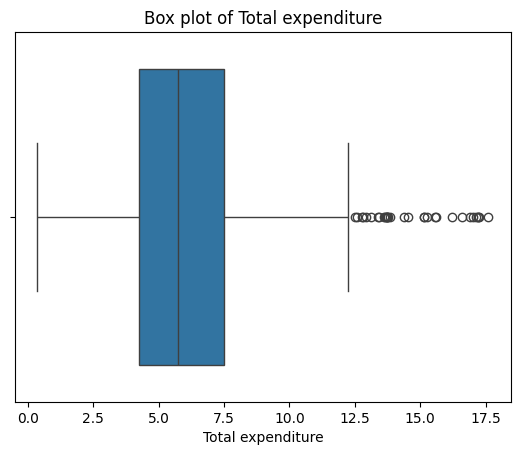

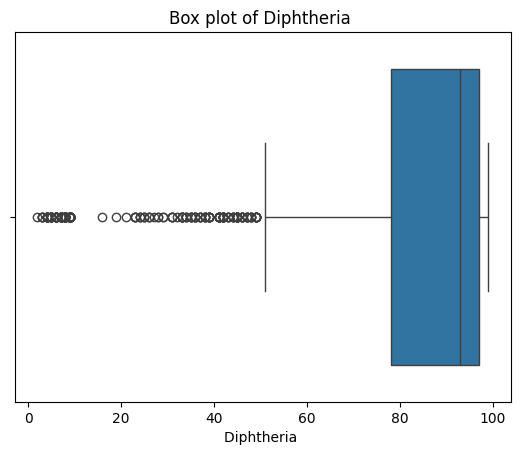

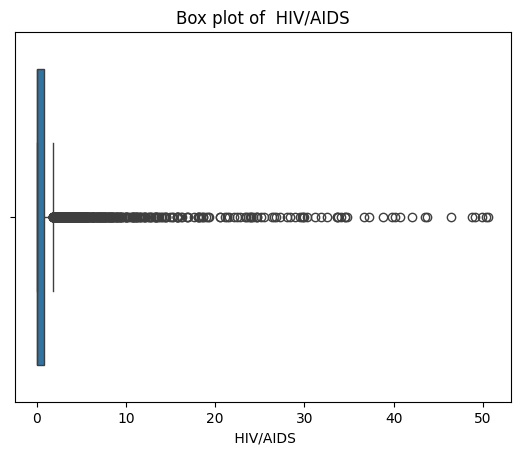

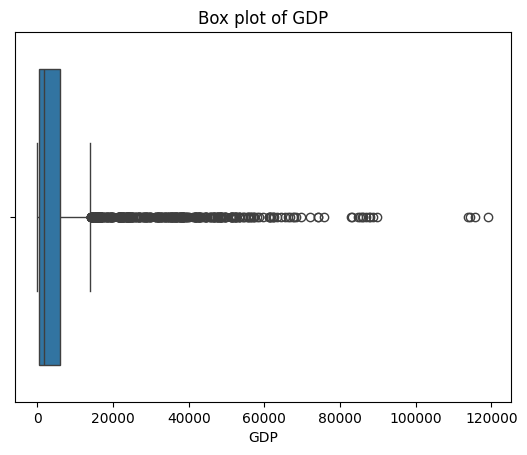

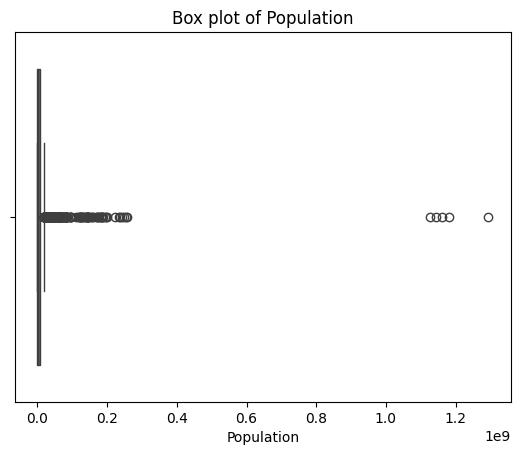

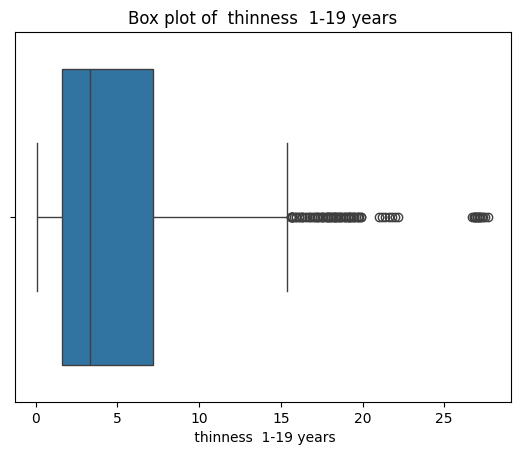

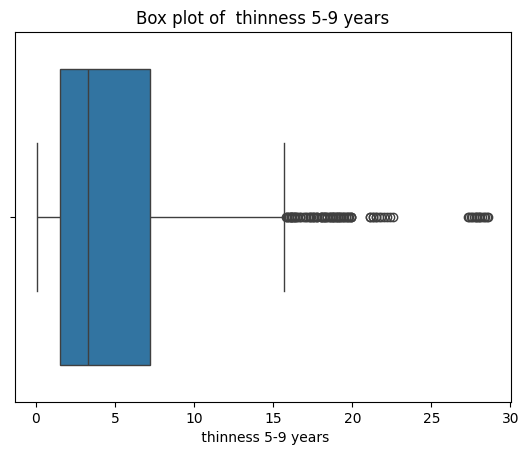

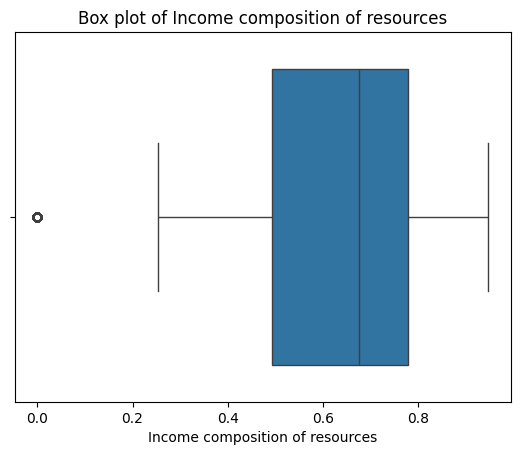

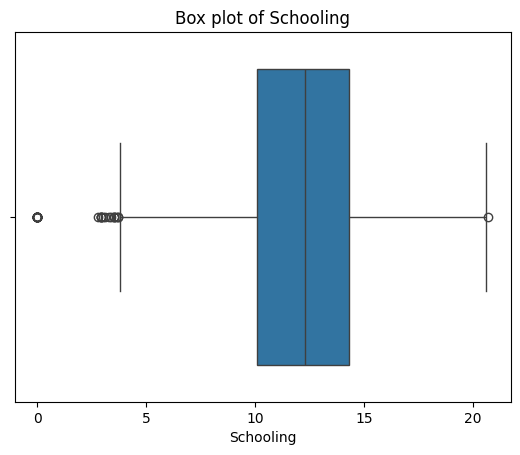

In [ ]:
# prompt: Box plot for all column in ab file

for col in ab.columns:
    plt.figure()
    sns.boxplot(x=ab[col])
    plt.title(f"Box plot of {col}")
    plt.show()


In [ ]:
# prompt: Replace all the outliers in all the column with means of their respective columns and name it as ab1

def replace_outliers_with_mean(df):
    df_filled = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_filled[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mean(), df[col])
    return df_filled

ab1 = replace_outliers_with_mean(ab)

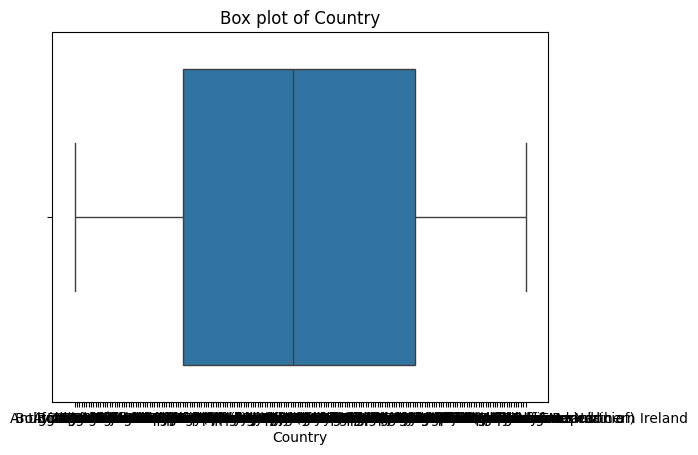

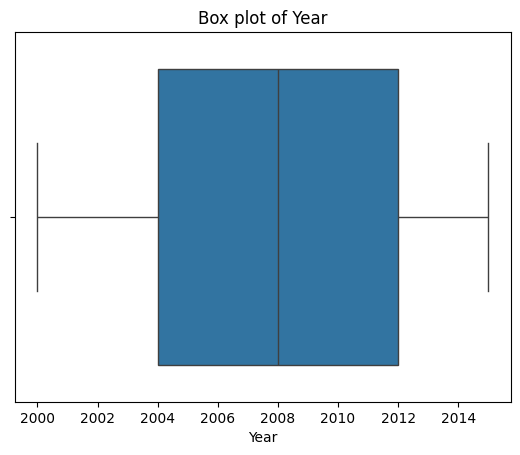

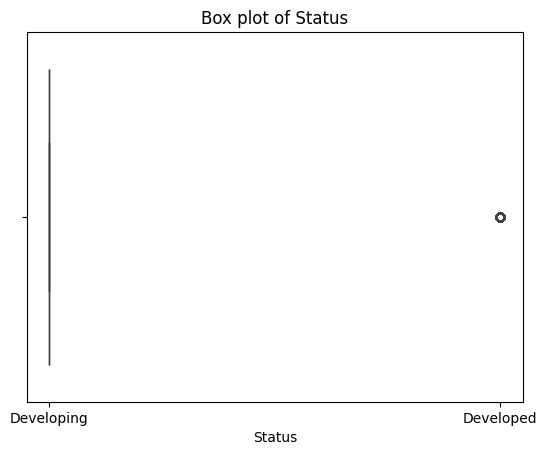

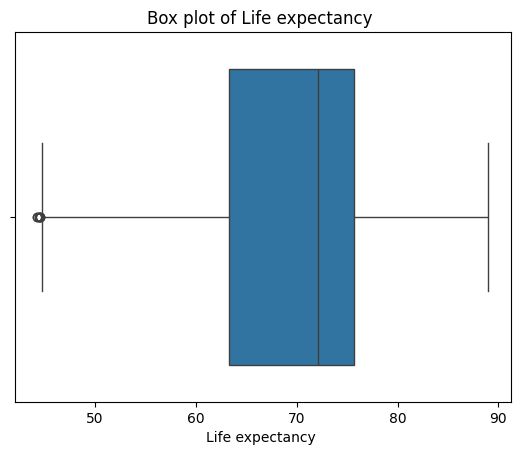

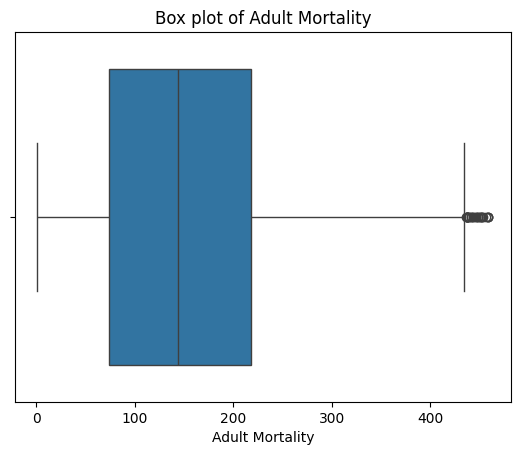

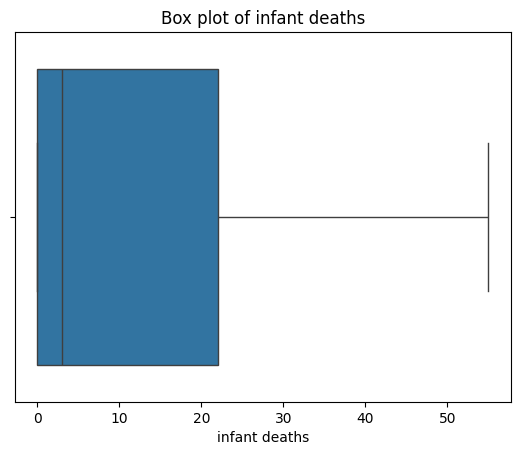

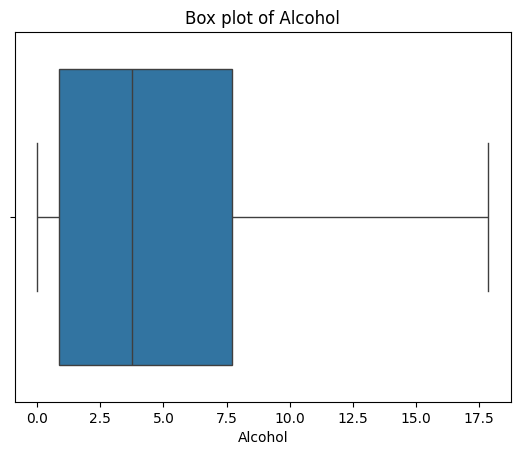

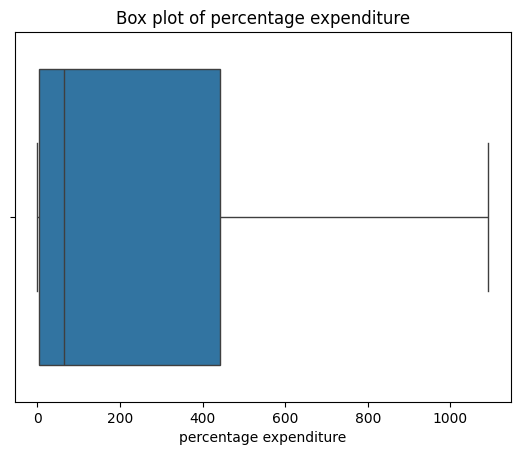

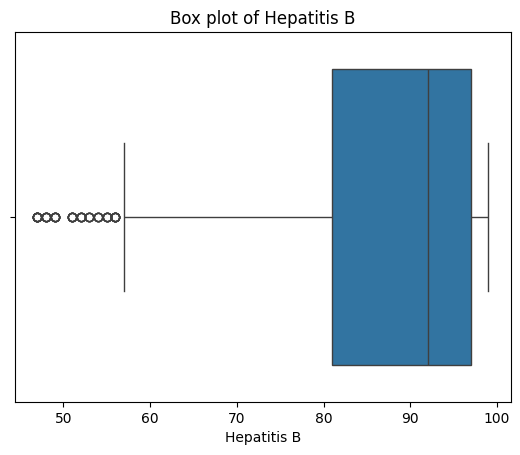

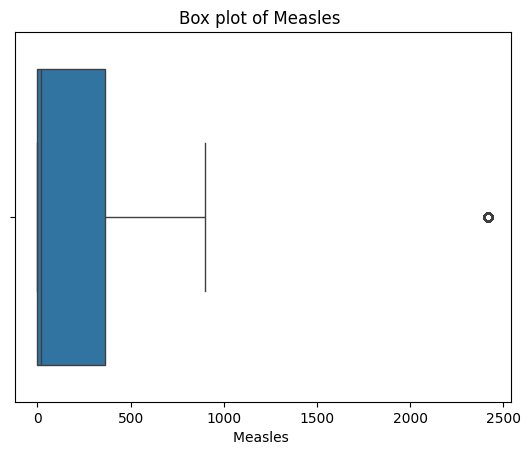

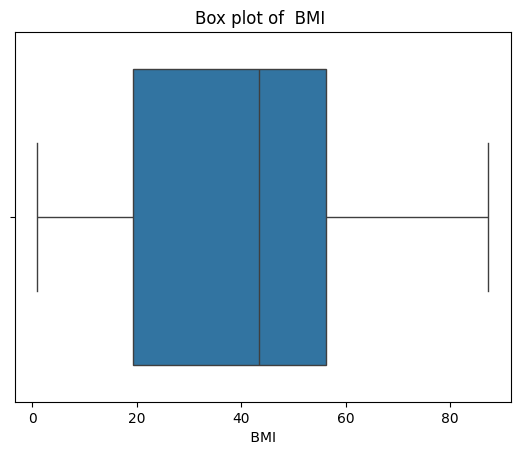

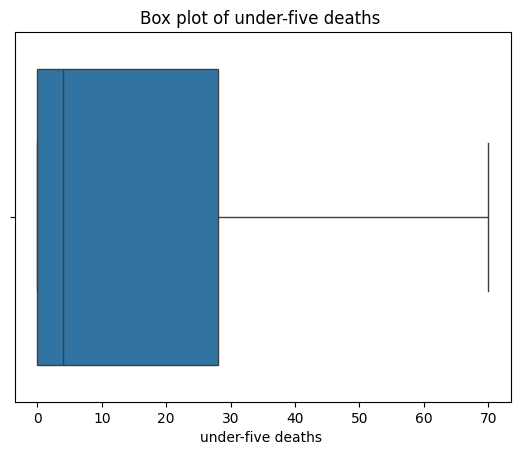

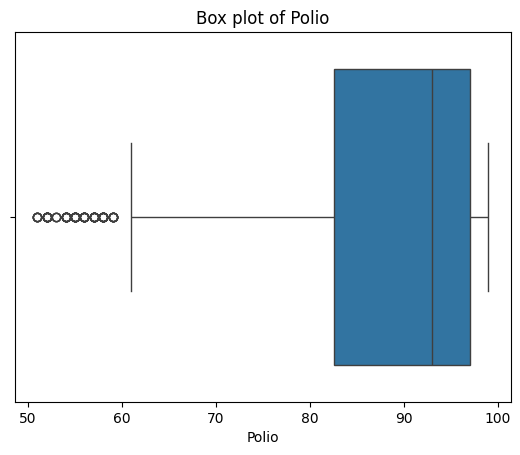

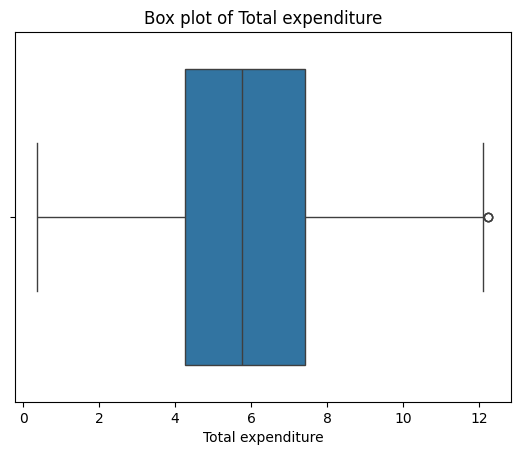

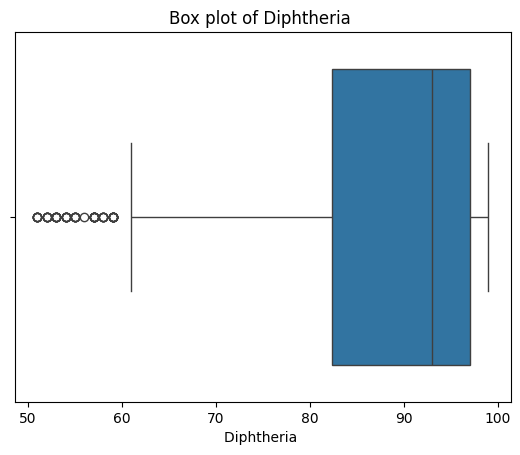

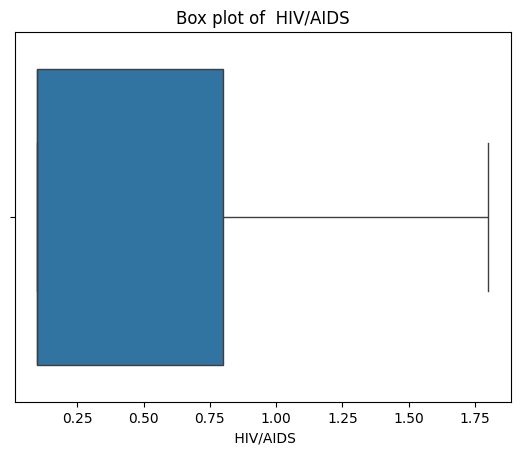

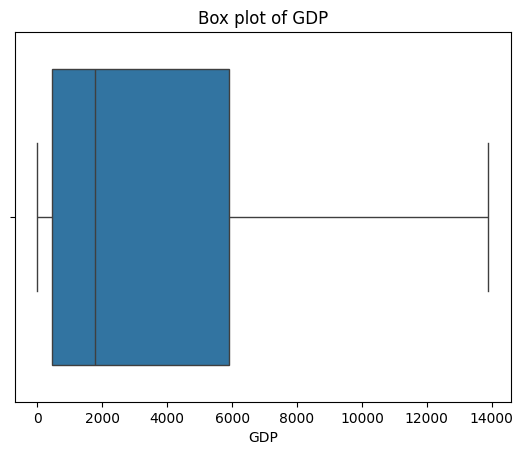

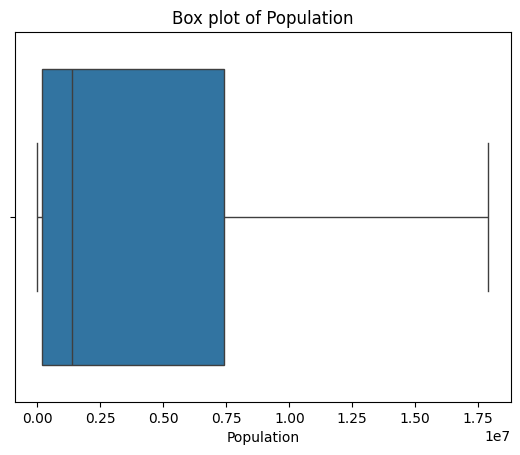

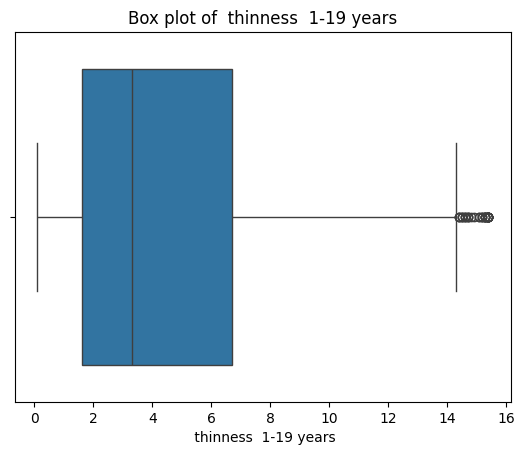

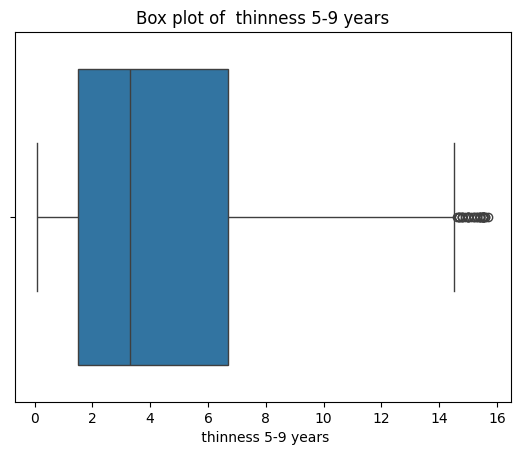

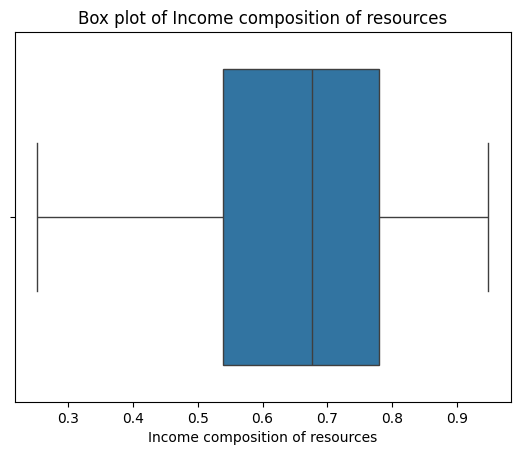

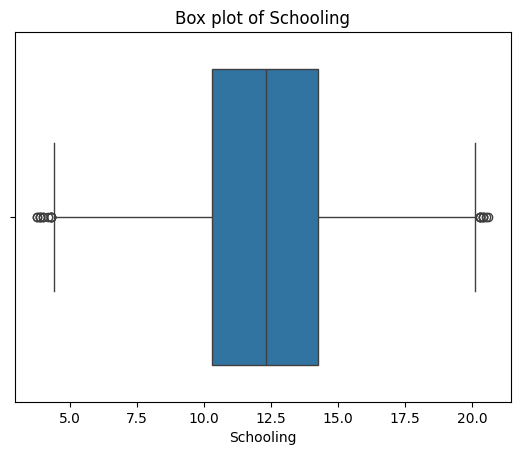

In [ ]:

for col in ab.columns:
    plt.figure()
    sns.boxplot(x=ab1[col])
    plt.title(f"Box plot of {col}")
    plt.show()

In [ ]:
# prompt: Remove the outliers from every columns of ab1 and replace with means of that respective columns and name it as ab2

ab2 = ab1.copy()
for col in ab2.columns:
    if pd.api.types.is_numeric_dtype(ab2[col]):
        Q1 = ab2[col].quantile(0.25)
        Q3 = ab2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        ab2[col] = np.where((ab2[col] < lower_bound) | (ab2[col] > upper_bound), ab2[col].mean(), ab2[col])

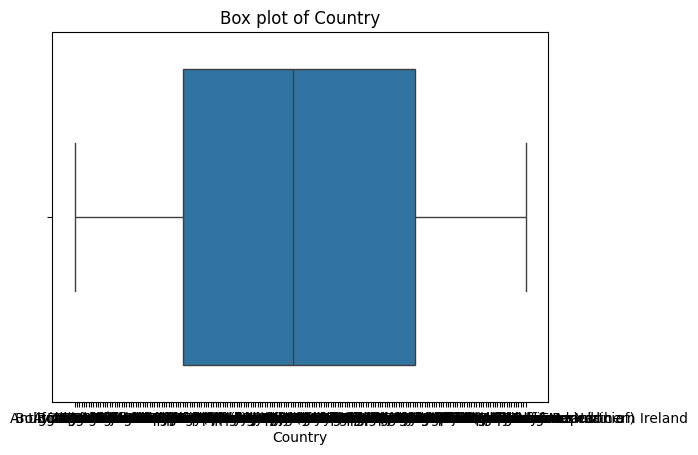

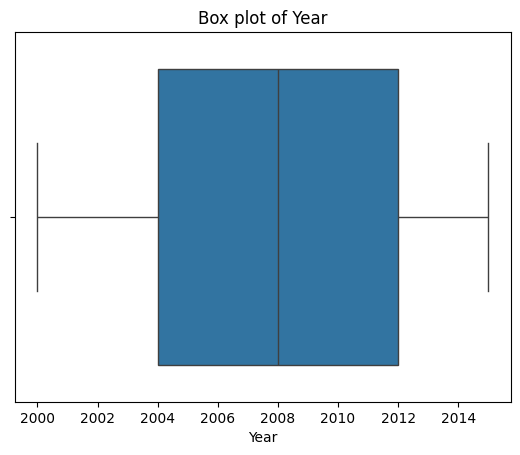

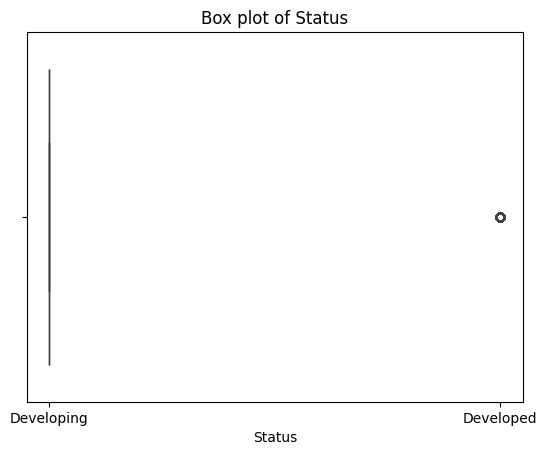

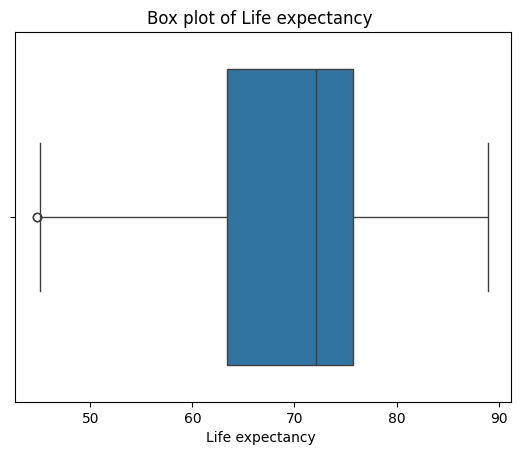

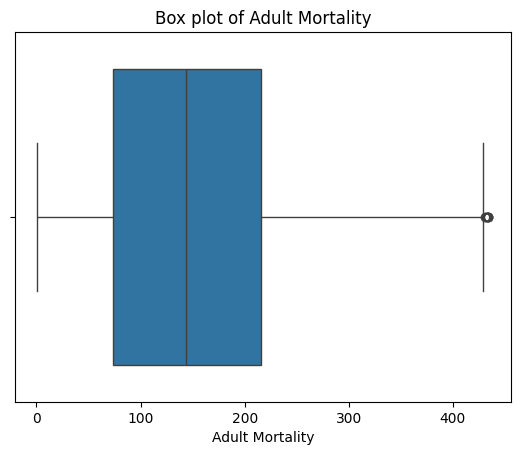

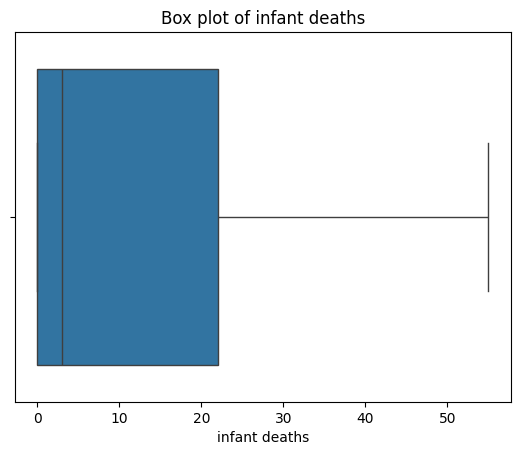

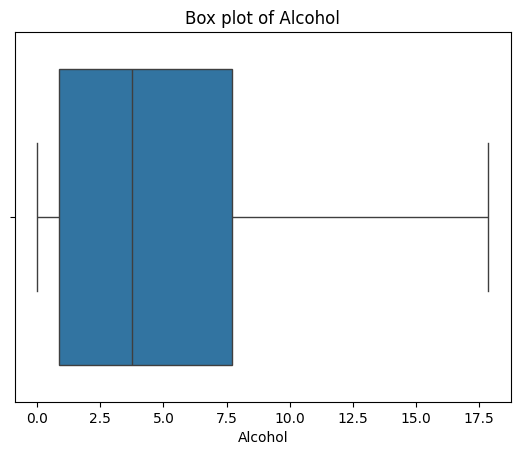

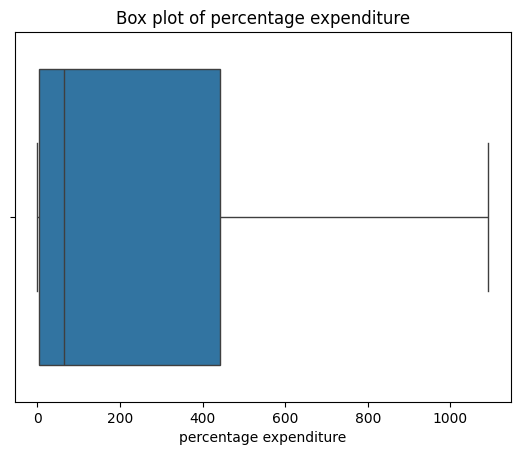

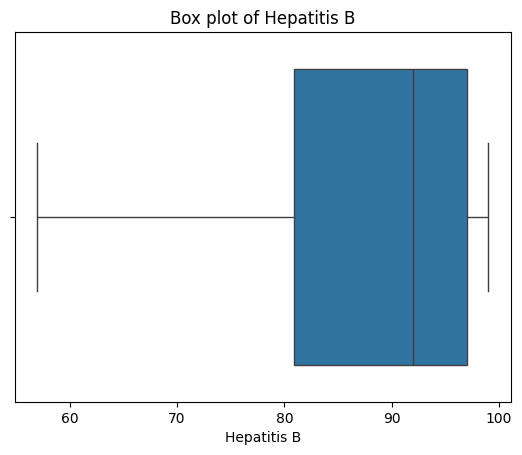

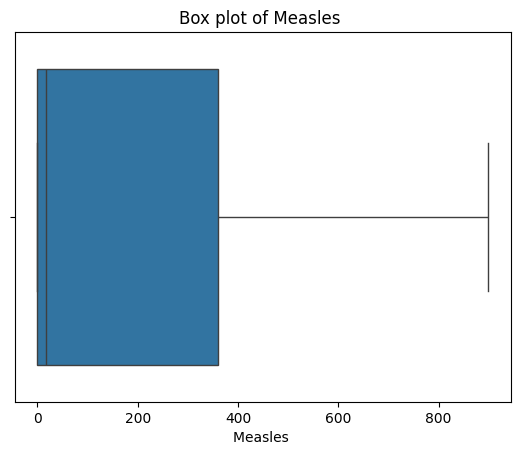

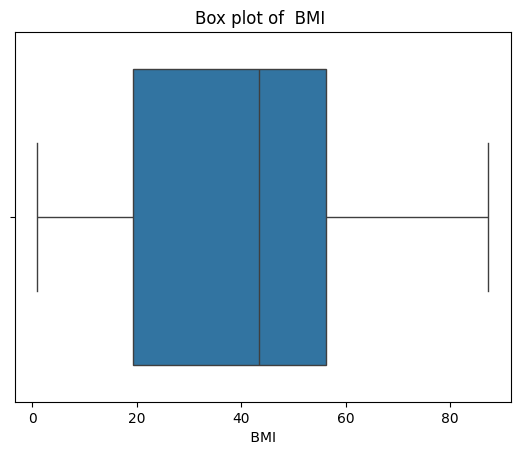

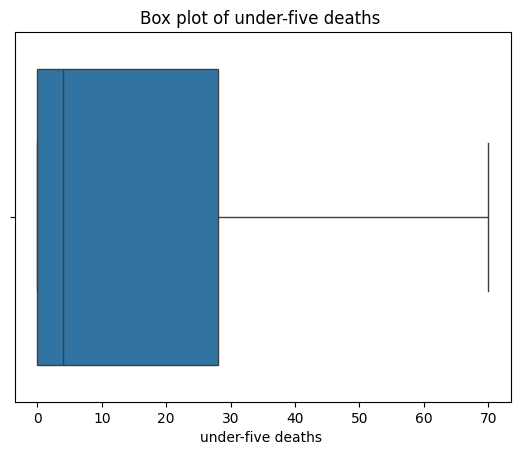

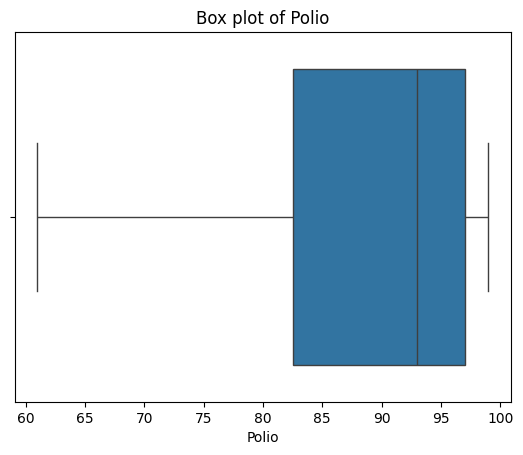

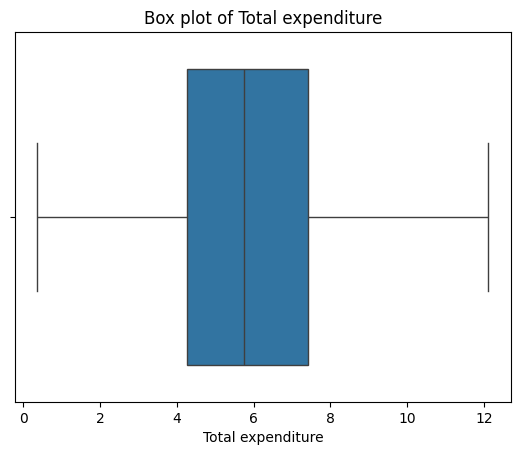

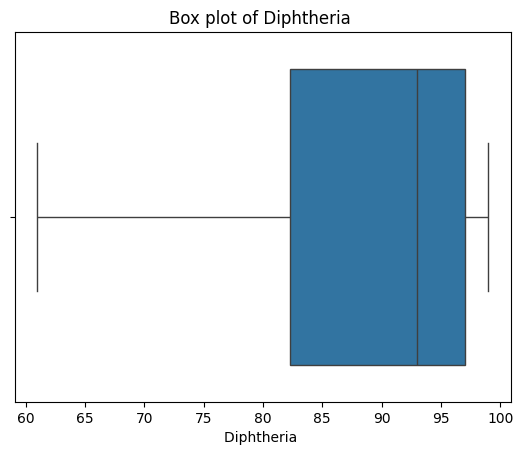

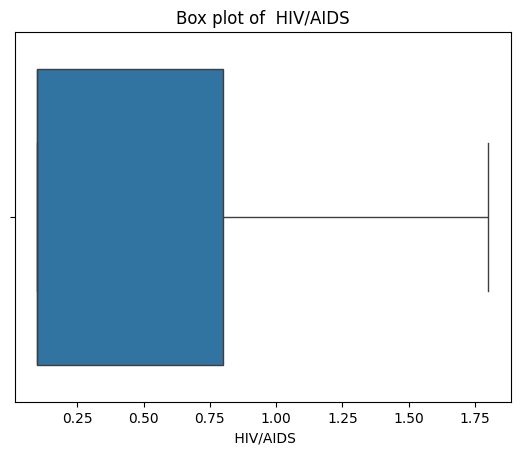

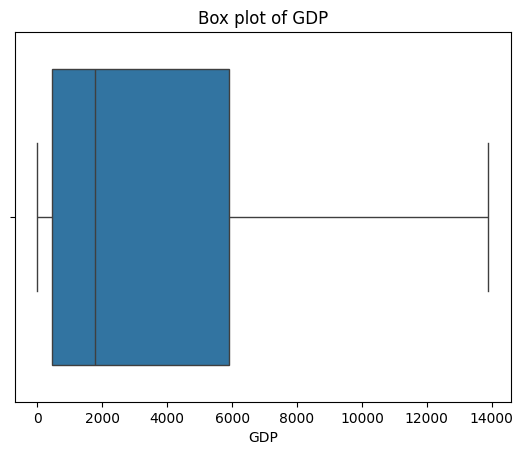

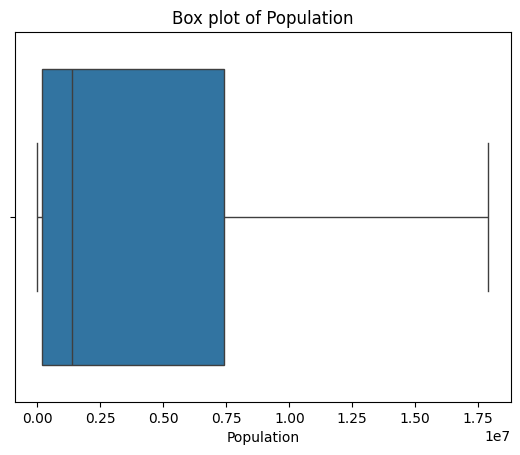

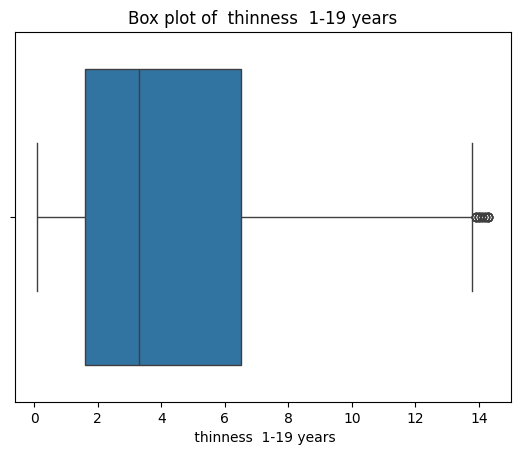

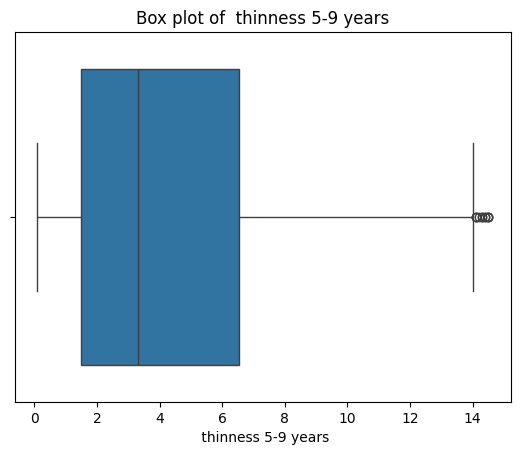

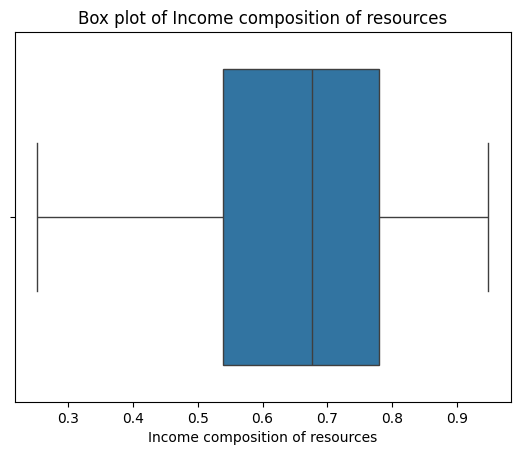

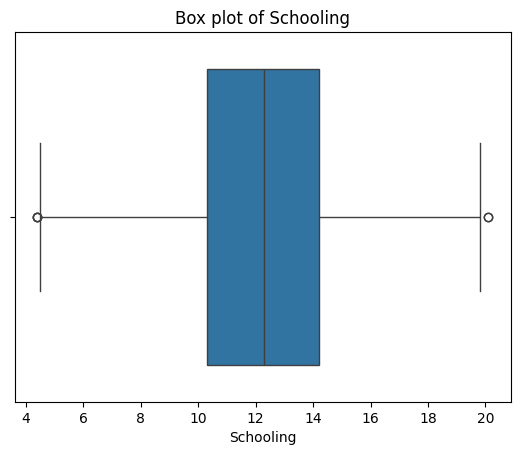

In [ ]:

for col in ab.columns:
    plt.figure()
    sns.boxplot(x=ab2[col])
    plt.title(f"Box plot of {col}")
    plt.show()

In [ ]:
# prompt: Replace all the NA values in all the columns with the means of their respective columns from ab2 and name it as ab3

ab3 = ab2.copy()  # Create a copy of ab2 to avoid modifying the original DataFrame

# Iterate through columns and fill NA values with the mean of numeric columns only
for col in ab3.columns:
    if pd.api.types.is_numeric_dtype(ab3[col]):  # Check if the column is numeric
        ab3[col] = ab3[col].fillna(ab3[col].mean())

In [ ]:
ab3.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,30.303948,0.01,71.279624,65.0,513.963579,...,82.550188,8.16,65.0,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,30.303948,0.01,73.523582,62.0,492.000000,...,88.465743,8.18,62.0,0.1,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,30.303948,0.01,73.219243,64.0,430.000000,...,62.000000,8.13,64.0,0.1,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,30.303948,0.01,78.184215,67.0,513.963579,...,67.000000,8.52,67.0,0.1,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,30.303948,0.01,7.097109,68.0,513.963579,...,68.000000,7.87,68.0,0.1,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5


In [ ]:
ab3.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
ab3.dtypes

,0
Country,object
Year,float64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,float64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,float64


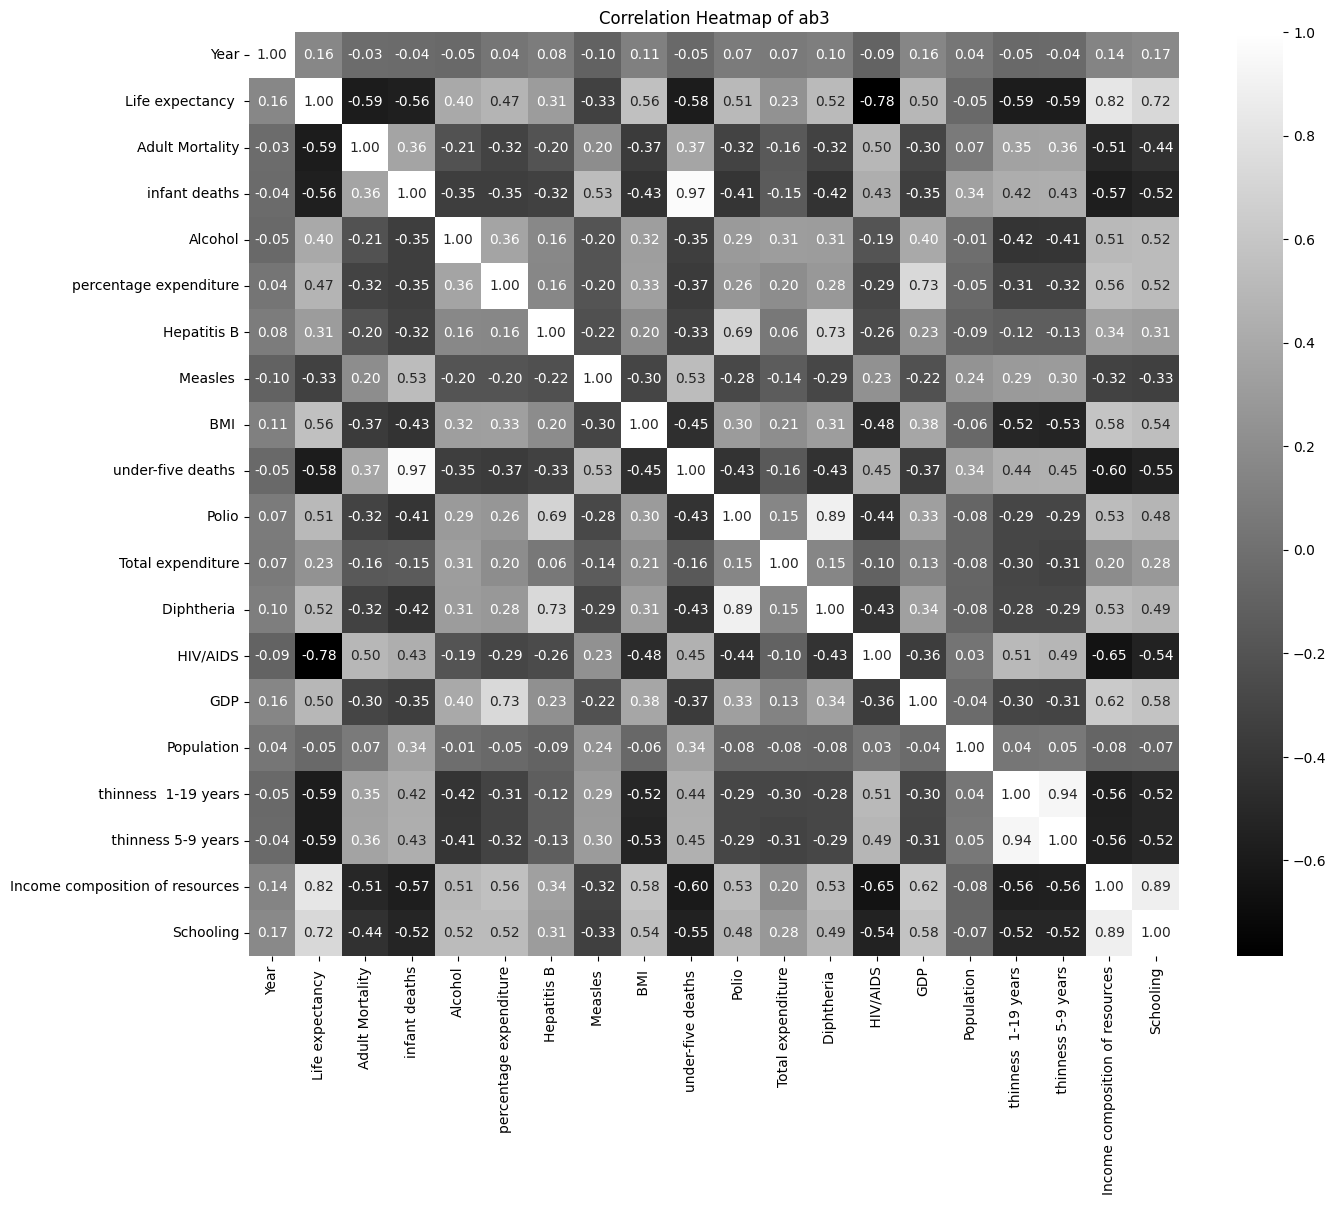

In [ ]:
# prompt: generate code for heat map for ab3 with Black and White shades

plt.figure(figsize=(15, 12))
# Select only numeric columns for correlation calculation
numeric_ab3 = ab3.select_dtypes(include=np.number)
sns.heatmap(numeric_ab3.corr(), annot=True, cmap='gray', fmt=".2f")
plt.title("Correlation Heatmap of ab3")
plt.show()

<Figure size 1000x800 with 0 Axes>

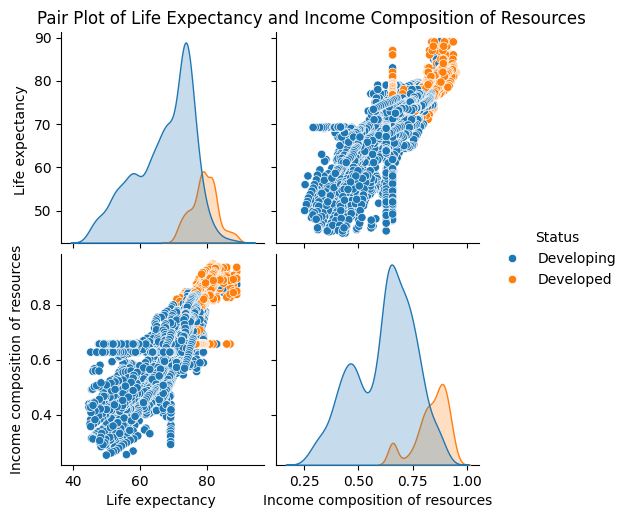

In [ ]:
# prompt: pair plot for Life expectancy and Income composition of resources in ab3

plt.figure(figsize=(10, 8))
sns.pairplot(data=ab3, vars=['Life expectancy ', 'Income composition of resources'], hue='Status', diag_kind='kde')
plt.suptitle('Pair Plot of Life Expectancy and Income Composition of Resources', y=1.02)
plt.show()

#### 2) Simple Linear Regression

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

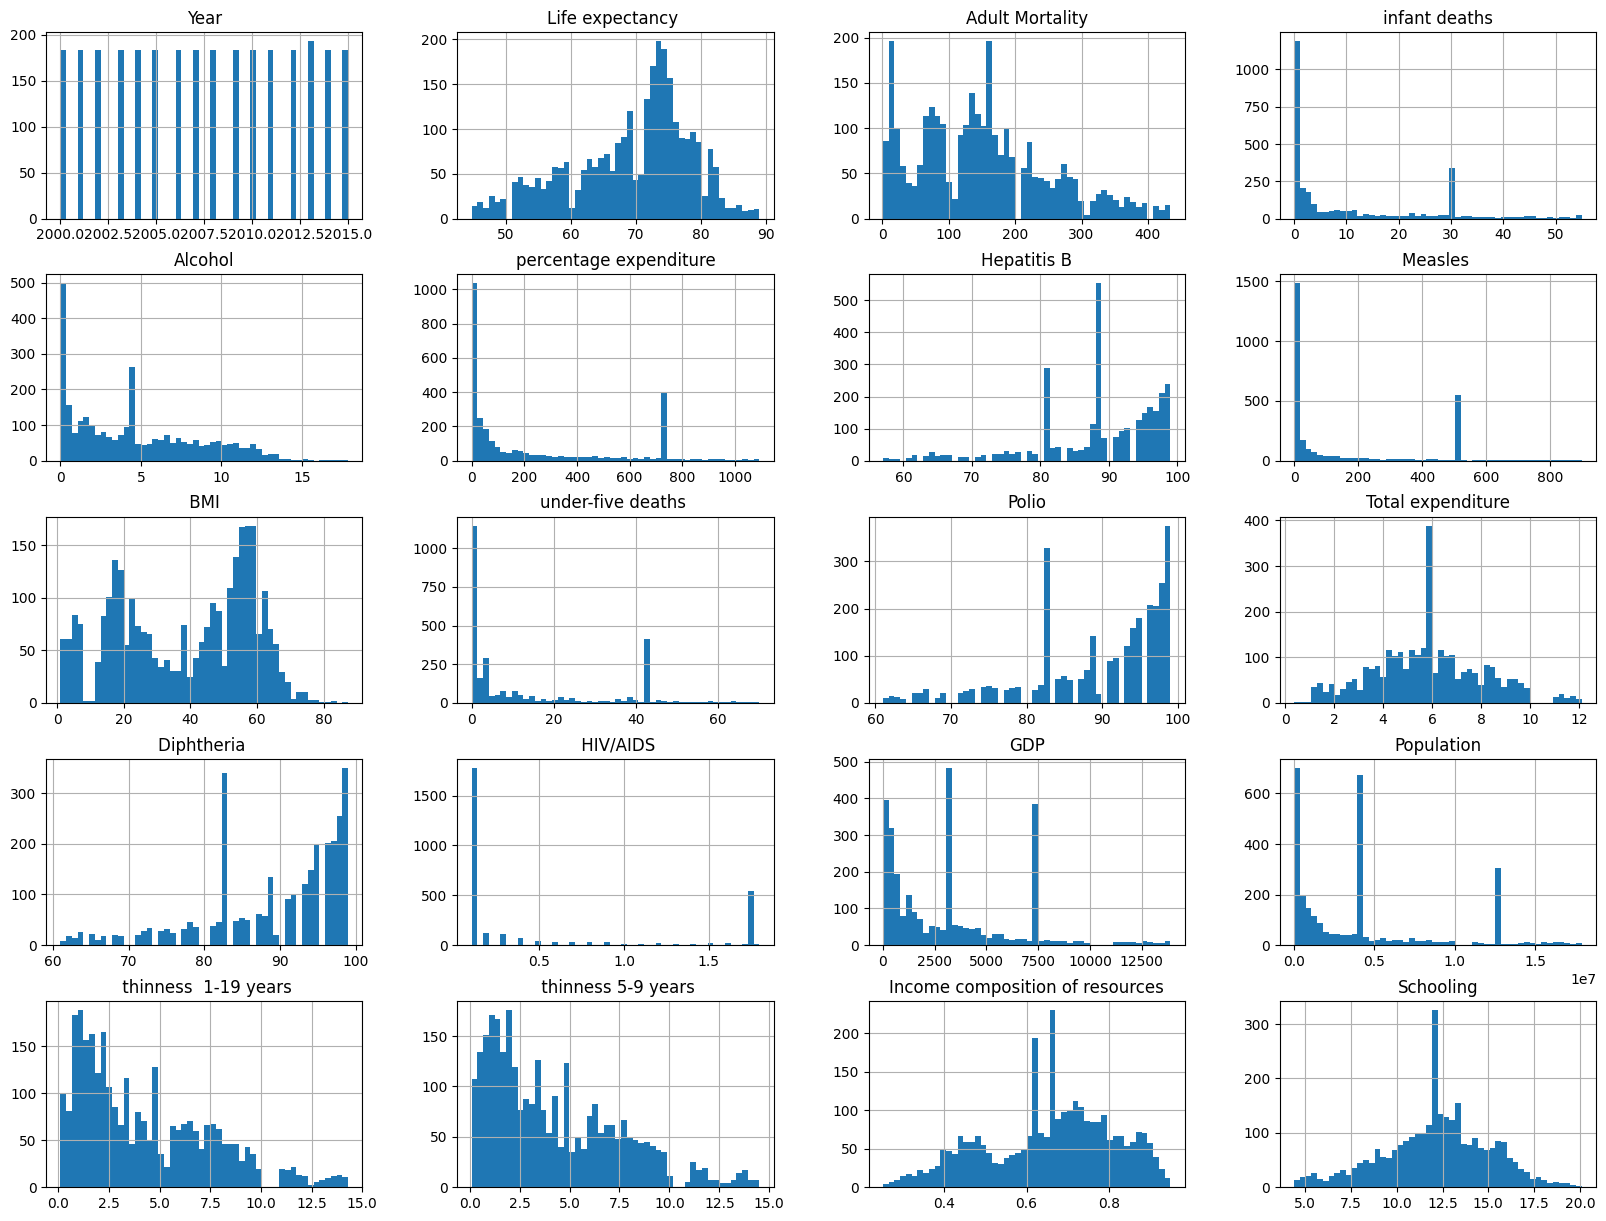

In [ ]:
ab3.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
X1 = ab3[["Income composition of resources"]]
y1 = ab3["Life expectancy "]

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
y1_pred = lr.predict(X1_test)

In [ ]:
r2_score(y1_test, y1_pred)

0.6856050398528724

In [ ]:
print(lr.intercept_)

36.85884333614759


In [ ]:
import pickle

In [ ]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [ ]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [ ]:
X1[0:5]

,Income composition of resources
0,0.479
1,0.476
2,0.470
3,0.463
4,0.454


In [ ]:
predictions = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
print(predictions.head())

      Actual  Predicted
2546    73.7  68.339056
650     75.9  75.615143
1740    74.2  74.575702
177     76.8  77.446539
1377    51.9  59.033584


#### 3)Multiple Linear Regression

In [ ]:
# prompt: drop Status and Country column in ab3

ab4 = ab3.drop(['Status', 'Country'], axis=1)

In [ ]:
ab4.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015.0,65.0,263.0,30.303948,0.01,71.279624,65.0,513.963579,19.1,42.035739,82.550188,8.16,65.0,0.1,584.259210,1.275338e+07,4.839704,4.870317,0.479,10.1
1,2014.0,59.9,271.0,30.303948,0.01,73.523582,62.0,492.000000,18.6,42.035739,88.465743,8.18,62.0,0.1,612.696514,3.275820e+05,4.839704,4.870317,0.476,10.0
2,2013.0,59.9,268.0,30.303948,0.01,73.219243,64.0,430.000000,18.1,42.035739,62.000000,8.13,64.0,0.1,631.744976,1.275338e+07,4.839704,4.870317,0.470,9.9
3,2012.0,59.5,272.0,30.303948,0.01,78.184215,67.0,513.963579,17.6,42.035739,67.000000,8.52,67.0,0.1,669.959000,3.696958e+06,4.839704,4.870317,0.463,9.8
4,2011.0,59.2,275.0,30.303948,0.01,7.097109,68.0,513.963579,17.2,42.035739,68.000000,7.87,68.0,0.1,63.537231,2.978599e+06,4.839704,4.870317,0.454,9.5


In [ ]:
X = ab4.drop(columns=["Life expectancy "])  # Add a trailing space to match the actual column name
y = ab4["Life expectancy "]  # Add a trailing space here as well

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2938, 19)
Shape of y: (2938,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 13.7499
  R² Score: 0.8352


In [ ]:
print(model_multiple.intercept_)

-203.95890899852932


In [ ]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [ ]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

   Actual  Predicted
0    73.7  70.502379
1    75.9  76.707101
2    74.2  76.329763
3    76.8  77.679561
4    51.9  50.920858


In [ ]:
#model persistance (saving and loading trained models)
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(model_multiple,f)

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

